In [47]:
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import datetime as dt

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline


In [48]:
start_date = dt.datetime(2018, 1, 1)

end_date = dt.datetime.now()

#df = yf.download("BTC-USD", start_date, end=end_date)
df = yf.Ticker("MSFT").history(interval = '1d', period="1y") 
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-08-10 00:00:00-04:00,323.489443,325.712077,318.687015,320.423431,20113700,0.00,0.0
2023-08-11 00:00:00-04:00,317.774163,319.907468,316.732294,318.518341,24342600,0.00,0.0
2023-08-14 00:00:00-04:00,318.895386,321.544645,317.595526,321.524811,18836100,0.00,0.0
2023-08-15 00:00:00-04:00,320.492921,322.566695,318.409215,319.361755,16966300,0.00,0.0
2023-08-16 00:00:00-04:00,318.983911,322.583443,317.989572,318.586182,20698900,0.68,0.0
...,...,...,...,...,...,...,...
2024-08-05 00:00:00-04:00,389.170013,401.040009,385.579987,395.149994,40709200,0.00,0.0
2024-08-06 00:00:00-04:00,400.000000,405.670013,398.500000,399.609985,24946500,0.00,0.0
2024-08-07 00:00:00-04:00,408.640015,410.079987,397.470001,398.429993,20650900,0.00,0.0


In [49]:
#data = df.filter(['Close'])
data = df

data['rsi'] = ta.rsi(data.Close, length=15)
data['ema_20'] = ta.ema(data.Close, length=20)
data['ema_50'] = ta.ema(data.Close, length=50)

# drop NaN
data = data.dropna(axis=0)
data.isna().value_counts()
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,rsi,ema_20,ema_50
Date,,,,,,,,,,
2023-10-19 00:00:00-04:00,330.269624,334.972857,329.036653,329.444336,25052100,0.0,0.0,56.261977,325.027244,323.380567
2023-10-20 00:00:00-04:00,329.842078,330.040958,323.607584,324.820679,25012600,0.0,0.0,50.529988,325.007571,323.437042
2023-10-23 00:00:00-04:00,323.627478,330.846388,322.553605,327.455688,24374700,0.0,0.0,53.427214,325.240725,323.594636
2023-10-24 00:00:00-04:00,329.424443,329.961395,325.745408,328.658813,31153600,0.0,0.0,54.724383,325.566257,323.793231
2023-10-25 00:00:00-04:00,343.066774,344.240117,335.708673,338.741425,55053800,0.0,0.0,63.782004,326.821035,324.379435
...,...,...,...,...,...,...,...,...,...,...
2024-08-05 00:00:00-04:00,389.170013,401.040009,385.579987,395.149994,40709200,0.0,0.0,25.842242,428.835209,432.889936
2024-08-06 00:00:00-04:00,400.000000,405.670013,398.500000,399.609985,24946500,0.0,0.0,29.906502,426.051854,431.584840
2024-08-07 00:00:00-04:00,408.640015,410.079987,397.470001,398.429993,20650900,0.0,0.0,29.448988,423.421201,430.284650


In [50]:
y = data['Close']
del data['Close']
del data['Dividends']
del data['Stock Splits']
X = data


# scaling data

from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler(feature_range=(0,1)).fit(X)
x_scaled = x_scaler.transform(X)

y_scaler = MinMaxScaler(feature_range=(0,1)).fit(y.values.reshape(-1, 1))
y_scaled = y_scaler.transform(y.values.reshape(-1, 1))


test_size = 0.3
len_x = len(X)
X_train = x_scaled[:int(len_x*(1-test_size))]
y_train = y_scaled[:int(len_x*(1-test_size))]
X_test = x_scaled[int(len_x*(1-test_size)):]
y_test = y_scaled[int(len_x*(1-test_size)):]


In [51]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.metrics import MeanAbsoluteError

model = Sequential()
model.add(LSTM(10, input_shape=(None, 1), activation='relu'))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error', metrics=[MeanAbsoluteError])

history = model.fit(X_train, y_train, epochs=100)


Epoch 1/100


c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3428 - mean_absolute_error: 0.5455
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3217 - mean_absolute_error: 0.5272 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3059 - mean_absolute_error: 0.5148 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2782 - mean_absolute_error: 0.4815 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2702 - mean_absolute_error: 0.4779 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2399 - mean_absolute_error: 0.4505 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2245 - mean_absolute_error: 0.4337 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2167 - mean_absolute_error: 0.4266 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2137 - mean_absolute_error: 0.4256 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2026 - mean_absolute_error: 0.4149 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.17

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 496ms/step


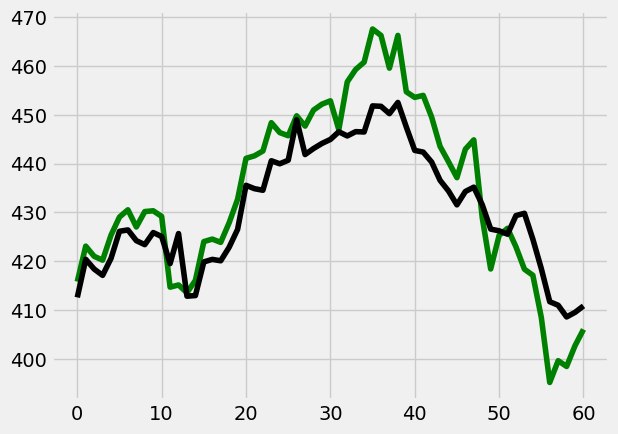

In [52]:
predicted = model.predict(X_test)

plt.plot(y_scaler.inverse_transform(y_test), color='green')

plt.plot(y_scaler.inverse_transform(predicted), color='black')

In [53]:

end_time = dt.datetime.now()
#day_ago = end_time + dt.timedelta(days=-50)
data_today = df

data_today['rsi'] = ta.rsi(data_today.Close, length=15)
data_today['ema_20'] = ta.ema(data_today.Close, length=20)
data_today['ema_50'] = ta.ema(data_today.Close, length=50)

# drop NaN
data_today = data_today.dropna(axis=0)

del data_today['Close']
del data_today['Dividends']
del data_today['Stock Splits']

data_today = data_today.iloc[-1]
print(data_today)
data_today_scaled = x_scaler.transform(data_today.values.reshape(1, -1))
print(data_today_scaled)
predict_today = model.predict(data_today_scaled)
inversed = y_scaler.inverse_transform(predict_today)
print(f'{end_time + dt.timedelta(days=1)} close price will be: {inversed}$')



Open      4.040300e+02
High      4.080500e+02
Low       4.022600e+02
Volume    1.901830e+07
rsi       3.636794e+01
ema_20    4.199776e+02
ema_50    4.282934e+02
Name: 2024-08-09 00:00:00-04:00, dtype: float64
[[0.56079449 0.56427037 0.561683   0.13254719 0.20225773 0.74635261
  0.90155572]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
2024-08-12 13:16:24.206196 close price will be: [[410.82822]]$


c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
